In [5]:
import pandas as pd
from pathlib import Path
import sys
from datetime import datetime,timedelta
import numpy as np
import matplotlib.pyplot as plt
import pytz

#sys.path.insert(0,Path('../archiver-py')) #suddenly not workin (18/07?)
sys.path.insert(0,r'C:\Users\mrimm\Desktop\Code\archiver-py')
from archiver import Archiver

## Run numbers, dates, times

In [ ]:
RUNS = {9:['2019-6-25 15:29:00',1800],
       10:['2019-6-25 16:04:00',1800],
       11:['2019-6-25 16:55:32',1800],
       13:['2019-6-25 17:48:00',1800],
       14:['2019-6-25 18:51:15',1800],
       15:['2019-6-25 19:56:00',1800],
       16:['2019-6-26 08:00:00',1800],
       17:['2019-6-26 09:04:30',1800],
       18:['2019-6-26 09:47:30',1800],
       19:['2019-6-26 10:30:00',1800],
       20:['2019-6-26 11:42:00',1800],
       21:['2019-6-26 12:16:30',1800],
       22:['2019-6-26 12:53:30',1800],
       23:['2019-6-26 13:27:30',1800],
       24:['2019-6-26 15:49:00',1800],
       25:['2019-6-26 16:22:10',1800],
       26:['2019-6-26 16:58:00',1800],
       27:['2019-6-26 17:34:30',1800],
       28:['2019-6-26 18:29:30',1800],
       29:['2019-6-26 19:34:00',1800],
       30:['2019-6-26 20:07:00',1800],
       31:['2019-6-26 20:40:00',1800],
       32:['2019-6-26 21:32:00',1800],
       33:['2019-6-26 22:38:00',1800],
       34:['2019-6-26 23:11:00',1800],
       35:['2019-6-26 23:44:00',1800],
       36:['2019-6-27 00:19:30',1800],
       37:['2019-6-27 12:00:40',1800],
       38:['2019-6-27 13:06:40',1800],
       39:['2019-6-27 14:01:00',1800],
       40:['2019-6-27 15:04:30',1800],
       41:['2019-6-27 15:41:10',1800],
       42:['2019-6-27 17:30:30',1800],
       43:['2019-6-27 18:12:00',1800],
       44:['2019-6-27 18:47:30',1800],
       45:['2019-6-27 19:22:00',3600],
       46:['2019-6-27 20:25:30',3600],
       47:['2019-6-27 21:31:00',3600],
       48:['2019-6-27 21:35:00',3600],
       49:['2019-6-27 23:38:10',3600],
       50:['2019-6-28 00:43:44',3600],
       51:['2019-6-28 01:50:12',3600],
        52:['2019-6-28 02:54:40',3600],
        53:['2019-6-28 04:03:18',3600],
        54:['2019-6-28 05:07:26',3600],
        55:['2019-6-28 06:12:21',3600],
        56:['2019-6-28 07:25:27',3600],
        57:['2019-6-28 08:50:30',3600],
        58:['2019-6-28 10:53:30',3600],
        59:['2019-6-28 12:25:00',3600],
        60:['2019-6-28 13:35:00',3600],
        61:['2019-6-28 15:17:30',3600],
        62:['2019-6-28 16:27:25',3600],
        63:['2019-6-28 17:39:00',3600],
        64:['2019-6-28 18:46:00',3600],
        65:['2019-6-28 19:49:00',3600],
        66:['2019-6-28 23:43:00',3600],
        67:['2019-6-29 00:46:00',3600],
        68:['2019-6-29 01:50:12',3600],
        69:['2019-6-29 03:29:14',3600],
        70:['2019-6-29 04:32:00',3600],
        71:['2019-6-29 05:48:56',1800],
        72:['2019-6-29 06:44:04',3600],
        73:['2019-6-29 07:49:30',3600],
        74:['2019-6-29 11:52:00',3600],
        75:['2019-6-29 13:23:50',3600],
        76:['2019-6-29 15:46:00',3600],
        77:['2019-6-29 16:58:30',1800],
        78:['2019-6-29 18:17:00',3600],
        79:['2019-6-29 19:31:00',1800],
        80:['2019-6-29 20:28:15',3600],
        81:['2019-6-29 21:35:00',1800],
        82:['2019-6-29 22:20:00',1800],
        83:['2019-6-29 22:55:30',1800],
        84:['2019-6-30 00:58:06',3600],
        85:['2019-6-30 02:02:32',3600],
        86:['2019-6-30 03:42:31',3600],
        87:['2019-6-30 04:46:20',3600],
        88:['2019-6-30 06:22:12',3600],
        89:['2019-6-30 07:29:49',3600],
        90:['2019-6-30 11:40:15',3600],
        91:['2019-6-30 12:45:50',1800],
        92:['2019-6-30 14:08:50',3600],
        93:['2019-6-30 15:25:00',3600],
        94:['2019-6-30 16:37:35',3600],
        96:['2019-6-30 17:51:00',1800],
        97:['2019-6-30 19:35:00',1800],
        98:['2019-6-30 20:15:00',1800],
        99:['2019-6-30 21:00:30',1800],
        100:['2019-6-30 21:34:00',1800],
        101:['2019-6-30 22:28:00',1800],
        102:['2019-6-30 23:04:00',1800],
        103:['2019-7-1 00:04:00',1800],
        104:['2019-7-1 00:39:30',1800],
       }

### retrieve data from epics

#### save data to csv and create currents dataframe

In [ ]:
PVs = {'target':'COSY:DBLM:03:RP:ADC:A',
       'lockin86':'NESP:DIAG:lockin86:MEAN:1',
       'lockin56':'NESP:DIAG:lockin56:MEAN:1',
       'lockin54':'NESP:DIAG:lockin54:MEAN:1',
       'lockin20':'NESP:DIAG:lockin20:MEAN:1',
       'lockin58':'NESP:DIAG:lockin58:MEAN:1'}

In [ ]:
archiver = Archiver()

data = pd.DataFrame()

for pv_no,pv in enumerate(list(PVs.values())):

    for run in list(RUNS.keys()):
        start = datetime.strptime(RUNS[run][0], '%Y-%m-%d %H:%M:%S').astimezone(pytz.timezone('Europe/Berlin'))
        end = datetime.strptime(RUNS[run][0], '%Y-%m-%d %H:%M:%S').astimezone(pytz.timezone('Europe/Berlin'))+timedelta(seconds=RUNS[run][1])

        times, values, meta = archiver.downloadScalar(pv, start, end)

        dict_temp = {'run':run,'times':times,'signal':values}
        df_temp = pd.DataFrame(data=dict_temp)
        #df_temp['start'] = times[0]

        #data = data.append(df_temp.groupby(['run','start']).agg({'current':['mean','std']}))
        
        df_temp.to_csv(Path('../../MISC/MLT Beamtime/EPICS data/{}_#{}'.format(list(PVs.keys())[pv_no],run)),index=False)
    #currents = data.reset_index()

    #currents.to_csv('currents',index=False)


    
    

#### calculate average current for runs in run_list

In [ ]:
run_list = range(90,92)
I = currents[currents['run'].isin(run_list)]['current']['mean'].mean()
print(I)

#### calculate error on average current for runs in run_list

In [ ]:
dI = np.sqrt(currents[currents['run'].isin(run_list)]['current']['std'].apply(lambda x: x**2).sum())/len(run_list)
print(dI)

#### look at last 5 runs

In [ ]:
currents.tail()

#### function for neutron yield calculation and neutron yield error calculation

In [ ]:
def nyield(N_t,LT_t,I_av,dI_av):
    
    nyield = N_t/LT_t/I_av*1.6e-19/(1.3e-6)
    dnyield = nyield*np.sqrt(1/N_t+(dI_av/I_av)**2)
    
    return nyield, dnyield

In [ ]:
nyield(1.1369e6+5.5435e5,2572+1301,I*1e-9,dI*1e-9)

In [ ]:
0.0137+2*0.0025

### calculate the run-(time-) dependence of the relative error on neutron yield for 30 MeV V (small target) runs

In [ ]:
N_run = [1.6322,1.634,1.6219,2.2795,3.2652,3.2499,3.287,3.2662,3.2710,3.2432,3.2485,3.2594,3.2633,3.2494,3.2518,3.2344]


N_run = [N*1e5 for N in N_run]


dnyield_rel = []
times = []

for j,i in enumerate(range(42,58)):
    
    I_i = currents[currents['run'].isin(range(42,i))]['current']['mean'].mean()
    dI_i = np.sqrt(currents[currents['run'].isin(range(42,i))]['current']['std'].apply(lambda x: x**2).sum())/len(range(42,i))
    
    N_acc = sum(N_run[:j+1])
    dnyield_i_rel = np.sqrt(1/N_acc+(dI_i/I_i)**2)
    
    dnyield_rel.append(dnyield_i_rel)
    times.append(RUNS[i][1]/60/60)


plt.plot(np.cumsum(times),dnyield_rel)
plt.xticks(range(len(np.cumsum(times))))
plt.title('time-dependence of relative error for 30 MeV V runs')
plt.show()


### look at current data of one run and FFT of current

In [ ]:
# source stable with #17
df_test = pd.read_csv(
    Path('../../MISC/MLT Beamtime/EPICS data/target_#20'),
    header = None, usecols = [1,2],
    names = ['time', 'signal'],
    skiprows=1
)

fig,ax = plt.subplots(2,1,figsize=(20,10))
df_test.plot(ax=ax[0])

fft = np.fft.fft(df_test['signal'].values)
freq = np.fft.fftfreq(df_test['signal'].size,d=0.1)
ax[1].plot(freq,np.abs(fft))
ax[1].set_yscale('log')
plt.show()
print(np.mean(df_test['signal'].values))
print(np.std(df_test['signal'].values))

In [ ]:
pd.read_csv(
    Path('../../MISC/MLT Beamtime/EPICS data/target_#104'),
    header = None, usecols = [1,2],
    names = ['time', 'signal'],
    skiprows=1
).mean()

### MWPC beam profiles during MD

In [ ]:
#focused

#45 2019-06-05 17:09:01
#40 2019-06-05 18:56:00
#30 2019-06-05 19:13:38
#20 2019-06-05 19:23:51
#10 2019-06-05 19:38:34


#not focused

#45 2019-06-05 17:03:24
#40 2019-06-05 18:53:00
#30 2019-06-05 19:10:09
#20 2019-06-05 19:20:58
#10 2019-06-05 19:34:35

In [24]:
mwpc_dict = {'45 MeV optimized': '2019-06-05 17:09:01',
            '40 MeV optimized': '2019-06-05 18:56:00',
            '30 MeV optimized': '2019-06-05 19:13:38',
            '20 MeV optimized': '2019-06-05 19:23:51',
            '10 MeV optimized': '2019-06-05 19:38:34',
            '45 MeV': '2019-06-05 17:03:24',
            '40 MeV': '2019-06-05 18:53:00',
            '30 MeV': '2019-06-05 19:10:09',
            '20 MeV': '2019-06-05 19:20:58',
            '10 MeV': '2019-06-05 19:34:35'}

In [6]:
archiver = Archiver()
    
def get_profile(start,end):
    timestampsX,dataX,metaX= archiver.downloadWaveform('EXBL:MWPC:45:Profile:X',start,end)
    if len(dataX[0]) < 64:
        for k in range(64-len(dataX[0])):
            dataX[0]=np.append(dataX[0],0)


    timestampsY,dataY,metaY= archiver.downloadWaveform('EXBL:MWPC:45:Profile:Y',start,end)
    if len(dataY[0]) < 64:
        for j in range(64-len(dataY[0])):
            dataY[0]=np.append(dataY[0],0)

    return dataX,dataY

In [8]:
t_test = '2019-06-05 17:03:24'
x_test,y_test = get_profile(datetime.strptime(t_test, '%Y-%m-%d %H:%M:%S'),datetime.strptime(t_test, '%Y-%m-%d %H:%M:%S'))


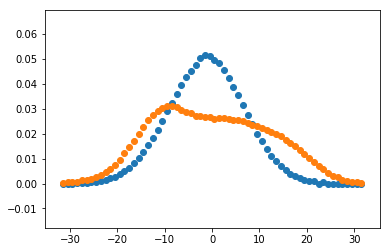

In [23]:
x = np.arange(0,len(x_test[0]))-31.5
y = np.arange(0,len(y_test[0]))-31.5
plt.scatter(x=x, y=x_test[0]/x_test[0].sum())
plt.scatter(x=y, y=y_test[0]/y_test[0].sum())

In [31]:
x_test[0]

array([  0.      ,   0.      ,   0.      ,   0.546875,   0.546875,
         0.546875,   1.640625,   1.640625,   2.1875  ,   3.828125,
         4.921875,   6.5625  ,   8.75    ,  12.03125 ,  14.765625,
        19.140625,  24.0625  ,  30.078125,  36.640625,  43.203125,
        50.859375,  59.609375,  69.453125,  76.5625  ,  85.3125  ,
        94.0625  , 101.71875 , 107.1875  , 113.203125, 119.765625,
       123.046875, 121.40625 , 117.578125, 114.84375 , 108.828125,
       101.171875,  92.421875,  84.765625,  74.921875,  65.625   ,
        56.875   ,  47.578125,  40.46875 ,  32.8125  ,  26.25    ,
        21.328125,  16.953125,  12.578125,   9.296875,   7.109375,
         4.921875,   3.28125 ,   2.1875  ,   2.1875  ,   0.      ,
         1.09375 ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ])

In [33]:
for i in mwpc_dict.items():
    
    profiles = get_profile(datetime.strptime(i[1], '%Y-%m-%d %H:%M:%S'),datetime.strptime(i[1], '%Y-%m-%d %H:%M:%S'))
    
    profiles = profiles[0][0],profiles[1][0]
    
    np.savetxt(r'C:\Users\mrimm\Desktop\MISC\MLT Beamtime\MWPC Profiles MD\{}.txt'.format(i[0]),profiles)

C:\Users\mrimm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


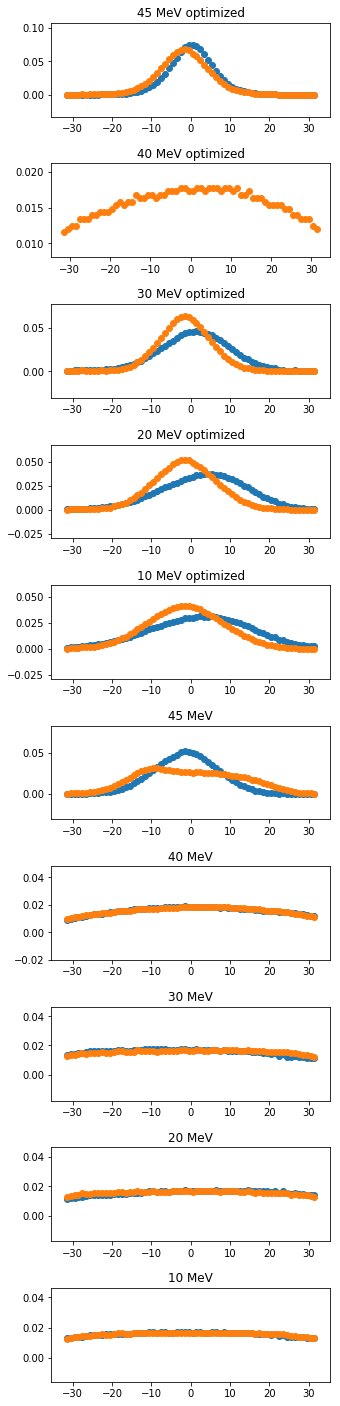

In [64]:
fig,ax = plt.subplots(len(mwpc_dict.items()),1,figsize=(5,25))

for n,i in enumerate(mwpc_dict.items()):
    profiles = np.loadtxt(r'C:\Users\mrimm\Desktop\MISC\MLT Beamtime\MWPC Profiles MD\{}.txt'.format(i[0]))
    
    x_data = np.arange(0,64)-31.5
    
    ax[n].scatter(x_data,profiles[0]/profiles[0].sum())
    ax[n].scatter(x_data,profiles[1]/profiles[1].sum())
    ax[n].set_title(i[0])
    
plt.subplots_adjust(hspace = 0.5)